In [1]:
import os
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import myServices as ms
import models as md
import numpy as np
import pandas as pd
import sklearn
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,roc_curve, auc, roc_auc_score, f1_score
import joblib

In [2]:
# to compute ececution time do: 
# with timeit():
#     # your code, e.g., 
class timeit(): 
    from datetime import datetime
    def __enter__(self):
        self.tic = self.datetime.now()
    def __exit__(self, *args, **kwargs):
        print('runtime: {}'.format(self.datetime.now() - self.tic))

## Importing and manipulating datasets

In [ ]:
sklearn.metrics.get_scorer_names()

In [ ]:
### Cleaning basin1DataSet 
dataSetPath = 'datasets/basin1Light_Clean.csv'
basinDataSet = pd.read_csv(dataSetPath, index_col = None)
# basin1Light = pd.read_csv('datasetBasin1_NoDataFree.csv', index_col = None)
print(basinDataSet.info())
basinDataSet.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2134268 entries, 0 to 2134267
Data columns (total 14 columns):
 #   Column      Dtype  
---  ------      -----  
 0   percentage  int64  
 1   TWI         float64
 2   TPI         float64
 3   FAcc        float64
 4   slope       float64
 5   elevation   float64
 6   x_coord     int64  
 7   y_coord     int64  
 8   DLSOL4R150  float64
 9   DLSOL5R150  float64
 10  DLSOL5R200  float64
 11  FAProx_01   float64
 12  FAProx_025  float64
 13  visibility  float64
dtypes: float64(11), int64(3)
memory usage: 228.0 MB
None


In [4]:
basinDataSet.isna().any()

fid           False
percentage     True
TWI           False
TPI            True
DLSOL4R150     True
DLSOL5R150     True
DLSOL5R200     True
FAProx_01     False
FAProx_025    False
visibility    False
slope         False
elevation     False
x_coord       False
y_coord       False
dtype: bool

In [4]:
colNames = ['percentage','DLSOL5R200', 'DLSOL5R150', 'DLSOL4R150']
for col in colNames: 
    basinDataSet[col].fillna(0,inplace=True)

In [5]:
basinDataSet.dropna(subset=['TPI'],inplace=True)

In [6]:
basinDataSet.drop(['fid'], axis =1, inplace=True)

In [7]:
basinDataSet.isna().sum()

percentage    0
TWI           0
TPI           0
DLSOL4R150    0
DLSOL5R150    0
DLSOL5R200    0
FAProx_01     0
FAProx_025    0
visibility    0
slope         0
elevation     0
x_coord       0
y_coord       0
dtype: int64

In [ ]:
#### NOrmalize Flow Accumulation
basinDataSet['FAcc'] = (basinDataSet['FAcc']- basinDataSet['FAcc'].min())/(basinDataSet['FAcc'].max()-basinDataSet['FAcc'].min())


In [8]:
### Replacing with 0 
repalcer  = basinDataSet['FAProx_01'].to_numpy()
basinDataSet['FAProx_01'] = [0 if repalcer[j] == -9999 else repalcer[j] for j in range(len(repalcer))]                                                                                                                         
                                                                                                                          

In [9]:
## Transform a column datatype
repalcer  = basinDataSet['percentage'].to_numpy().astype('int')
basinDataSet.loc[:,'percentage'] = repalcer

In [10]:
basinDataSet.describe()

percentage            TWI            TPI     DLSOL4R150  \
count  337102.000000  337102.000000  337102.000000  337102.000000   
mean        0.064274       9.561742      -0.000343       0.001828   
std         0.549788       4.091912       0.202439       0.002676   
min         0.000000      -7.983510      -3.459990       0.000000   
25%         0.000000       5.924340      -0.084225       0.000000   
50%         0.000000      10.430295      -0.000060       0.000000   
75%         0.000000      12.813280       0.085620       0.003730   
max         5.000000      23.845820       4.819790       0.013170   

          DLSOL5R150     DLSOL5R200      FAProx_01     FAProx_025  \
count  337102.000000  337102.000000  337102.000000  337102.000000   
mean        0.003774       0.003785     230.534306      60.472845   
std         0.003890       0.003283     168.578843      44.464991   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000880      93.005380      24.020820   
50%         0.003040       0.003290     200.249850      51.739730   
75%         0.005930       0.005910     337.342560      88.887570   
max         0.020200       0.016340     900.000000     268.001860   

          visibility          slope      elevation        x_coord  \
count  337102.000000  337102.000000  337102.000000  337102.000000   
mean        0.046110       6.622236     133.232419  359622.664410   
std         0.045132       5.237760      32.044910     967.632139   
min         0.000020       0.001370       0.047130  358208.000000   
25%         0.017780       2.775075     119.764798  358938.000000   
50%         0.031670       5.431835     138.491225  359413.000000   
75%         0.056780       9.109063     152.126040  360098.000000   
max         0.396390      50.883080     227.877210  364270.000000   

            y_coord  
count  3.371020e+05  
mean   5.270253e+06  
std    1.218491e+03  
min    5.266260e+06  
25%    5.269408e+06  
50%    5.270243e+06  
75%    5.271088e+06  
max    5.272723e+06

In [11]:
basinDataSet.to_csv('datasets/basin2_CleanDataSet.csv', index=None)

In [ ]:
ds = DS.head(5)
s = {}
s['Datas'] = ds
print(s)

## balanced sampling

In [20]:
## Stratified Split
from sklearn.model_selection import StratifiedShuffleSplit

X,Y = ms.importDataSet('datasets/basin2_CleanDataSet.csv', 'percentage')
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=50)
for train_index, test_index in sss.split(X, Y):
    print("TRAIN:", train_index.size, "TEST:", test_index.size)
    X_train = X.iloc[train_index]
    y_train = Y.iloc[train_index]
    X_test = X.iloc[test_index]
    y_test = Y.iloc[test_index]

TRAIN: 269681 TEST: 67421


In [21]:
## Describing training set
print(len(X_train['elevation']), len(y_train) )
Counter(y_train)

269681 269681


Counter({0: 265407, 5: 3265, 1: 1009})

In [22]:
#####    Creating training set     #####
X_train.loc[:,'percentage'] = y_train
X_train.head()


/var/folders/s5/cqkwnnps0f1_35_bccj0y8q80000gn/T/ipykernel_57994/795959617.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[:,'percentage'] = y_train


TWI      TPI  DLSOL4R150  DLSOL5R150  DLSOL5R200  FAProx_01  \
319049  13.23320  0.10762     0.00000     0.00494     0.00383  310.64450   
138740  11.08076  0.10121     0.00016     0.01031     0.01036  147.05441   
99816    4.25131  0.13725     0.00000     0.00000     0.00138  311.12698   
317125   5.08887  0.05531     0.00000     0.00479     0.00316  345.03625   
43808    3.72386 -0.13462     0.00636     0.00784     0.00737  103.07764   

        FAProx_025  visibility     slope  elevation  x_coord  y_coord  \
319049   135.59129     0.05487   5.95773  151.67293   360223  5268848   
138740    32.06244     0.05627   2.95738  135.00565   358778  5269963   
99816     66.57327     0.09231  21.43172  152.12724   359383  5270853   
317125    69.46222     0.08738   5.81288  148.67877   359093  5268818   
43808     66.57327     0.02767  11.20703   79.11296   358998  5272173   

        percentage  
319049           0  
138740           0  
99816            0  
317125           0  
43808            0

In [23]:
## Removing coordinates from training set
X_train.drop(['x_coord','y_coord'], axis =1, inplace=True)
X_train.head()
Counter(X_train['percentage'])

/var/folders/s5/cqkwnnps0f1_35_bccj0y8q80000gn/T/ipykernel_57994/137826540.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.drop(['x_coord','y_coord'], axis =1, inplace=True)


Counter({0: 265407, 5: 3265, 1: 1009})

In [24]:
X_train.head()

TWI      TPI  DLSOL4R150  DLSOL5R150  DLSOL5R200  FAProx_01  \
319049  13.23320  0.10762     0.00000     0.00494     0.00383  310.64450   
138740  11.08076  0.10121     0.00016     0.01031     0.01036  147.05441   
99816    4.25131  0.13725     0.00000     0.00000     0.00138  311.12698   
317125   5.08887  0.05531     0.00000     0.00479     0.00316  345.03625   
43808    3.72386 -0.13462     0.00636     0.00784     0.00737  103.07764   

        FAProx_025  visibility     slope  elevation  percentage  
319049   135.59129     0.05487   5.95773  151.67293           0  
138740    32.06244     0.05627   2.95738  135.00565           0  
99816     66.57327     0.09231  21.43172  152.12724           0  
317125    69.46222     0.08738   5.81288  148.67877           0  
43808     66.57327     0.02767  11.20703   79.11296           0

In [25]:
X_train.to_csv('datasets/basin2_Training.csv', index=None)

In [26]:
#####. Creating Test set
print(X_test.head())
X_test.loc[:,'percentage'] = y_test
print(X_test.head())
print(X_test.info())
Counter(X_test['percentage'])


             TWI      TPI  DLSOL4R150  DLSOL5R150  DLSOL5R200  FAProx_01  \
181646  13.22700 -0.15295     0.00000     0.00000     0.00153  188.48077   
331797   5.38891  0.08672     0.00000     0.00274     0.00338  232.00217   
76798   15.70403 -0.36807     0.00432     0.00457     0.00421  156.52477   
323713   8.40157 -0.09019     0.00000     0.00154     0.00279  212.89670   
159061  12.05325 -0.48570     0.00000     0.00343     0.00407  217.83020   

        FAProx_025  visibility     slope  elevation  x_coord  y_coord  
181646    37.69616     0.04950   7.77198  132.64413   359408  5269288  
331797    46.40043     0.07283   3.84599  141.86752   359128  5268638  
76798     97.01546     0.01745  11.81375  101.92716   359268  5271843  
323713    54.74486     0.02544   2.92901  136.06129   359753  5268658  
159061    43.56604     0.00461  17.94483  148.81717   360838  5269658  
             TWI      TPI  DLSOL4R150  DLSOL5R150  DLSOL5R200  FAProx_01  \
181646  13.22700 -0.15295     0.000

/var/folders/s5/cqkwnnps0f1_35_bccj0y8q80000gn/T/ipykernel_57994/1327857362.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[:,'percentage'] = y_test


Counter({0: 66352, 5: 816, 1: 253})

In [27]:
X_test.to_csv('datasets/basin2_Test.csv', index=None)

In [28]:
## This proportions are the reason why a sample_weight of 0.01 for the majority class give best results for regression
totalTrain = sum([265407, 3265, 1009]) 
totalValidation = sum([66352, 816, 253])
print("Summary of traning and test dataset class balance")
print(f"Training Set:", '\n', "Class 0: %.3f" %(265407/totalTrain), " Class 1: %.4f" %(1009/totalTrain), "Class 5: %.4f"%(3265/totalTrain))
print("Testing Set:", '\n', "Class 0: %.3f" %(66352/totalValidation)," Class 1: %.4f" %(253/totalValidation),  "Class 5: %.4f"%(816/totalValidation))



Summary of traning and test dataset class balance
Training Set: 
 Class 0: 0.984  Class 1: 0.0037 Class 5: 0.0121
Testing Set: 
 Class 0: 0.984  Class 1: 0.0038 Class 5: 0.0121


In [29]:
print(totalTrain, totalValidation)

269681 67421


In [ ]:
model = ms.loadModel('./outputs/2022-08-05/00-35-58/2208050035.pkl')
dataSetToSave = ms.makePredictionToImportAsSHP(csvName, model, X, Y, 'percentage')
print(dataSetToSave.head())

## Controled sampling

In [ ]:
DS = pd.read_csv('basin1Light_Clean_Training.csv', index_col = None)
print(DS.head())


In [ ]:
print(DS.columns)

In [ ]:
plt.boxplot(DS['FAcc']) # , , DS['elevation'], DS['disToRiv']]

In [ ]:
## Resampling appliying class selection by rule:

# RULE1: Select point at a distance to river less than 300m. 

# # newDS = pseudoClassCreation(DS, "distanceToRiver", 300, 2)
def pseudoClassCreation(dataset, conditionVariable, threshold, pseudoClass, targetClassName):
    '''
    Replace <targetClass> by  <pseudoClass> where <conditionVariable >= threshold>. 
    Return:
      dataset with new classes group. 
    '''
    datsetReclassified = dataset.copy()
    actualTarget = (np.array(dataset[targetClassName])).ravel()
    conditionVar = (np.array(dataset[conditionVariable])).ravel()
    datsetReclassified[targetClassName] = [ pseudoClass if conditionVar[j] >= threshold 
                                           else actualTarget[j]
                                           for j in range(len(actualTarget))]
    print(Counter(datsetReclassified[targetClassName]))
    return  datsetReclassified

def revertPseudoClassCreation(dataset, originalClass, pseudoClass, targetClassName):
    '''
    Restablich  <targetClass> with <originalClass> where <targetClassName == pseudoClass>. 
    Return:
      dataset with original classes group. 
    '''
    datsetReclassified = dataset.copy()
    actualTarget = (np.array(dataset[targetClassName])).ravel()
    datsetReclassified[targetClassName] = [ originalClass if actualTarget[j] == pseudoClass
                                           else actualTarget[j]
                                           for j in range(len(actualTarget))]
    print(Counter(datsetReclassified[targetClassName]))
    return  datsetReclassified


print(Counter(X_train['percentage']))
newDS = pseudoClassCreation(X_train, 'disToRiv', 200, 2, 'percentage')
y = newDS['percentage']
newDS.drop(['percentage'], axis=1, inplace = True)
x_res,y_res = ms.randomUndersampling(newDS, y, )
x_res['percentage'] = y_res
# newDatase = revertPseudoClassCreation(x_res, 0, 2, 'percentage')


In [ ]:
x_res.to_csv('basin1ControlClass0Sampling4Class_ToSHP.csv',index = None)

# Data description and visualization

In [80]:
#### import dataset to describe
DS= pd.read_csv('datasets/basin4_Training.csv', index_col=None)
DS.head()

TPI       TWI  LDSOL5R200  LDSOL5R150  LDSOL4R150  FAProx_025  \
0 -0.00034  14.39598     0.00774     0.01004     0.00474   255.04901   
1 -0.21971  13.37331     0.00310     0.00114     0.00000   276.81219   
2  0.00001  15.71532     0.00544     0.00800     0.00197   325.96011   
3 -0.24402   9.40016     0.00712     0.00975     0.00550     7.07107   
4  0.06554   5.30098     0.00202     0.00269     0.00000   822.51135   

   FAProx_01  visibility     FAcc     slope  elevation  percentage  
0   76.32169     0.01397  0.00023   0.63286  143.95445           0  
1  276.81219     0.10493  0.00008   6.91255  149.28308           0  
2  111.01802     0.01069  0.00086   0.01081  122.72339           5  
3    5.00000     0.04387  0.00124  12.48343  139.97217           0  
4  428.51486     0.18383  0.00002   2.63780  183.58789           0

In [ ]:
DS.drop(['x_coord','y_coord'], axis = 1, inplace=True)
DS.head()

In [ ]:
### FAcc vs Labels
targets = DS['percentage']
FAcc = original['FAcc']
FAcc_norm = DS['FAcc_norm']
fig, axs = plt.subplots(1, 2, figsize=(13,4), sharey=True)
fig.text(-0.02, 0.5, 'labels', va='center', rotation='vertical')
fig.text(0.5, 1, 'Flow accumulation vs labels distribution', ha ='center')
axs[0].scatter(FAcc,targets)
# axs[0].set_title("Facc")
axs[0].set(xlabel='a) Flow Accumulation')
axs[1].scatter(FAcc_norm,targets)
# axs[1].set_title("FAcc_norm")
axs[1].set(xlabel='b) Flow Accumulation estandardized')
plt.rcParams['font.size'] = '20'
fig.tight_layout()


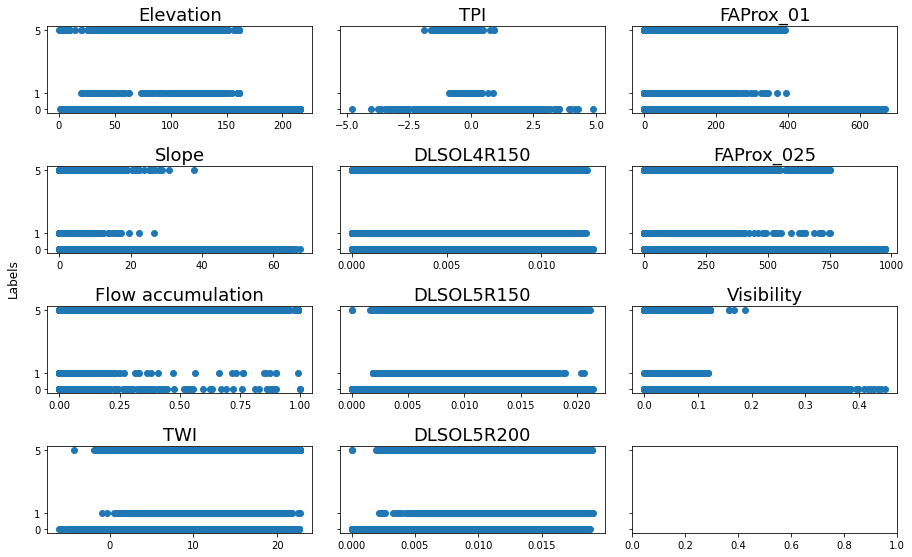

In [82]:

## Plot all features vs labels
# 'disToRiv', 'TWI', 'TPI', 'slope', 'elevation',

targets = DS['percentage']
# targets = np.where(targets == 5,2,targets)

E = DS['elevation'] 
slope = DS['slope']
FAcc = DS['FAcc']
TWI = DS['TWI']
TPI = DS['TPI']
DLSOL4R150 = DS['LDSOL4R150']
DLSOL5R150 = DS['LDSOL5R150']
DLSOL5R200 = DS['LDSOL5R200']
FAProx_01 = DS['FAProx_01']
FAProx_025 = DS['FAProx_025']
visibility = DS['visibility']

fig, axs = plt.subplots(4,3, figsize=(13, 8), sharey=True)
fig.supylabel('Labels')
plt.rcParams['font.size'] = '15'
plt.yticks([0,1,5])

'''
E = DS['elevation'] 
slope = DS['slope']
FAcc = DS['FAcc']
TWI = DS['TWI']
'''
axs[0, 0].scatter(E,targets)
axs[0, 0].set_title("Elevation")
axs[1, 0].scatter(slope,targets)
axs[1, 0].set_title("Slope")
axs[2, 0].scatter(FAcc,targets)
axs[2, 0].set_title("Flow accumulation")
axs[3, 0].scatter(TWI,targets)
axs[3, 0].set_title("TWI")

'''
TPI = DS['TPI']
DLSOL4R150 = DS['DLSOL4R150']
DLSOL5R150 = DS['DLSOL5R150']
DLSOL5R200 = DS['DLSOL5R200']
'''
axs[0, 1].scatter(TPI,targets)
axs[0, 1].set_title('TPI')
axs[1, 1].scatter(DLSOL4R150,targets)
axs[1, 1].set_title("DLSOL4R150")
axs[2, 1].scatter(DLSOL5R150,targets)
axs[2, 1].set_title("DLSOL5R150")
axs[3, 1].scatter(DLSOL5R200,targets)
axs[3, 1].set_title("DLSOL5R200")

'''
FAProx_01 = DS['FAProx_01']
FAProx_025 = DS['FAProx_025']
visibility = DS['visibility']
'''
axs[0, 2].scatter(FAProx_01,targets)
axs[0, 2].set_title('FAProx_01')
axs[1, 2].scatter(FAProx_025,targets)
axs[1, 2].set_title("FAProx_025")
axs[2, 2].scatter(visibility,targets)
axs[2, 2].set_title("Visibility")

fig.tight_layout()


In [ ]:
print(DS.head())
#  Return a dataset with the rows corresponding to the index where condition in DS.columName is valid. 
dsArray = DS[DS.percentage != 0] 
print(dsArray.head()) 

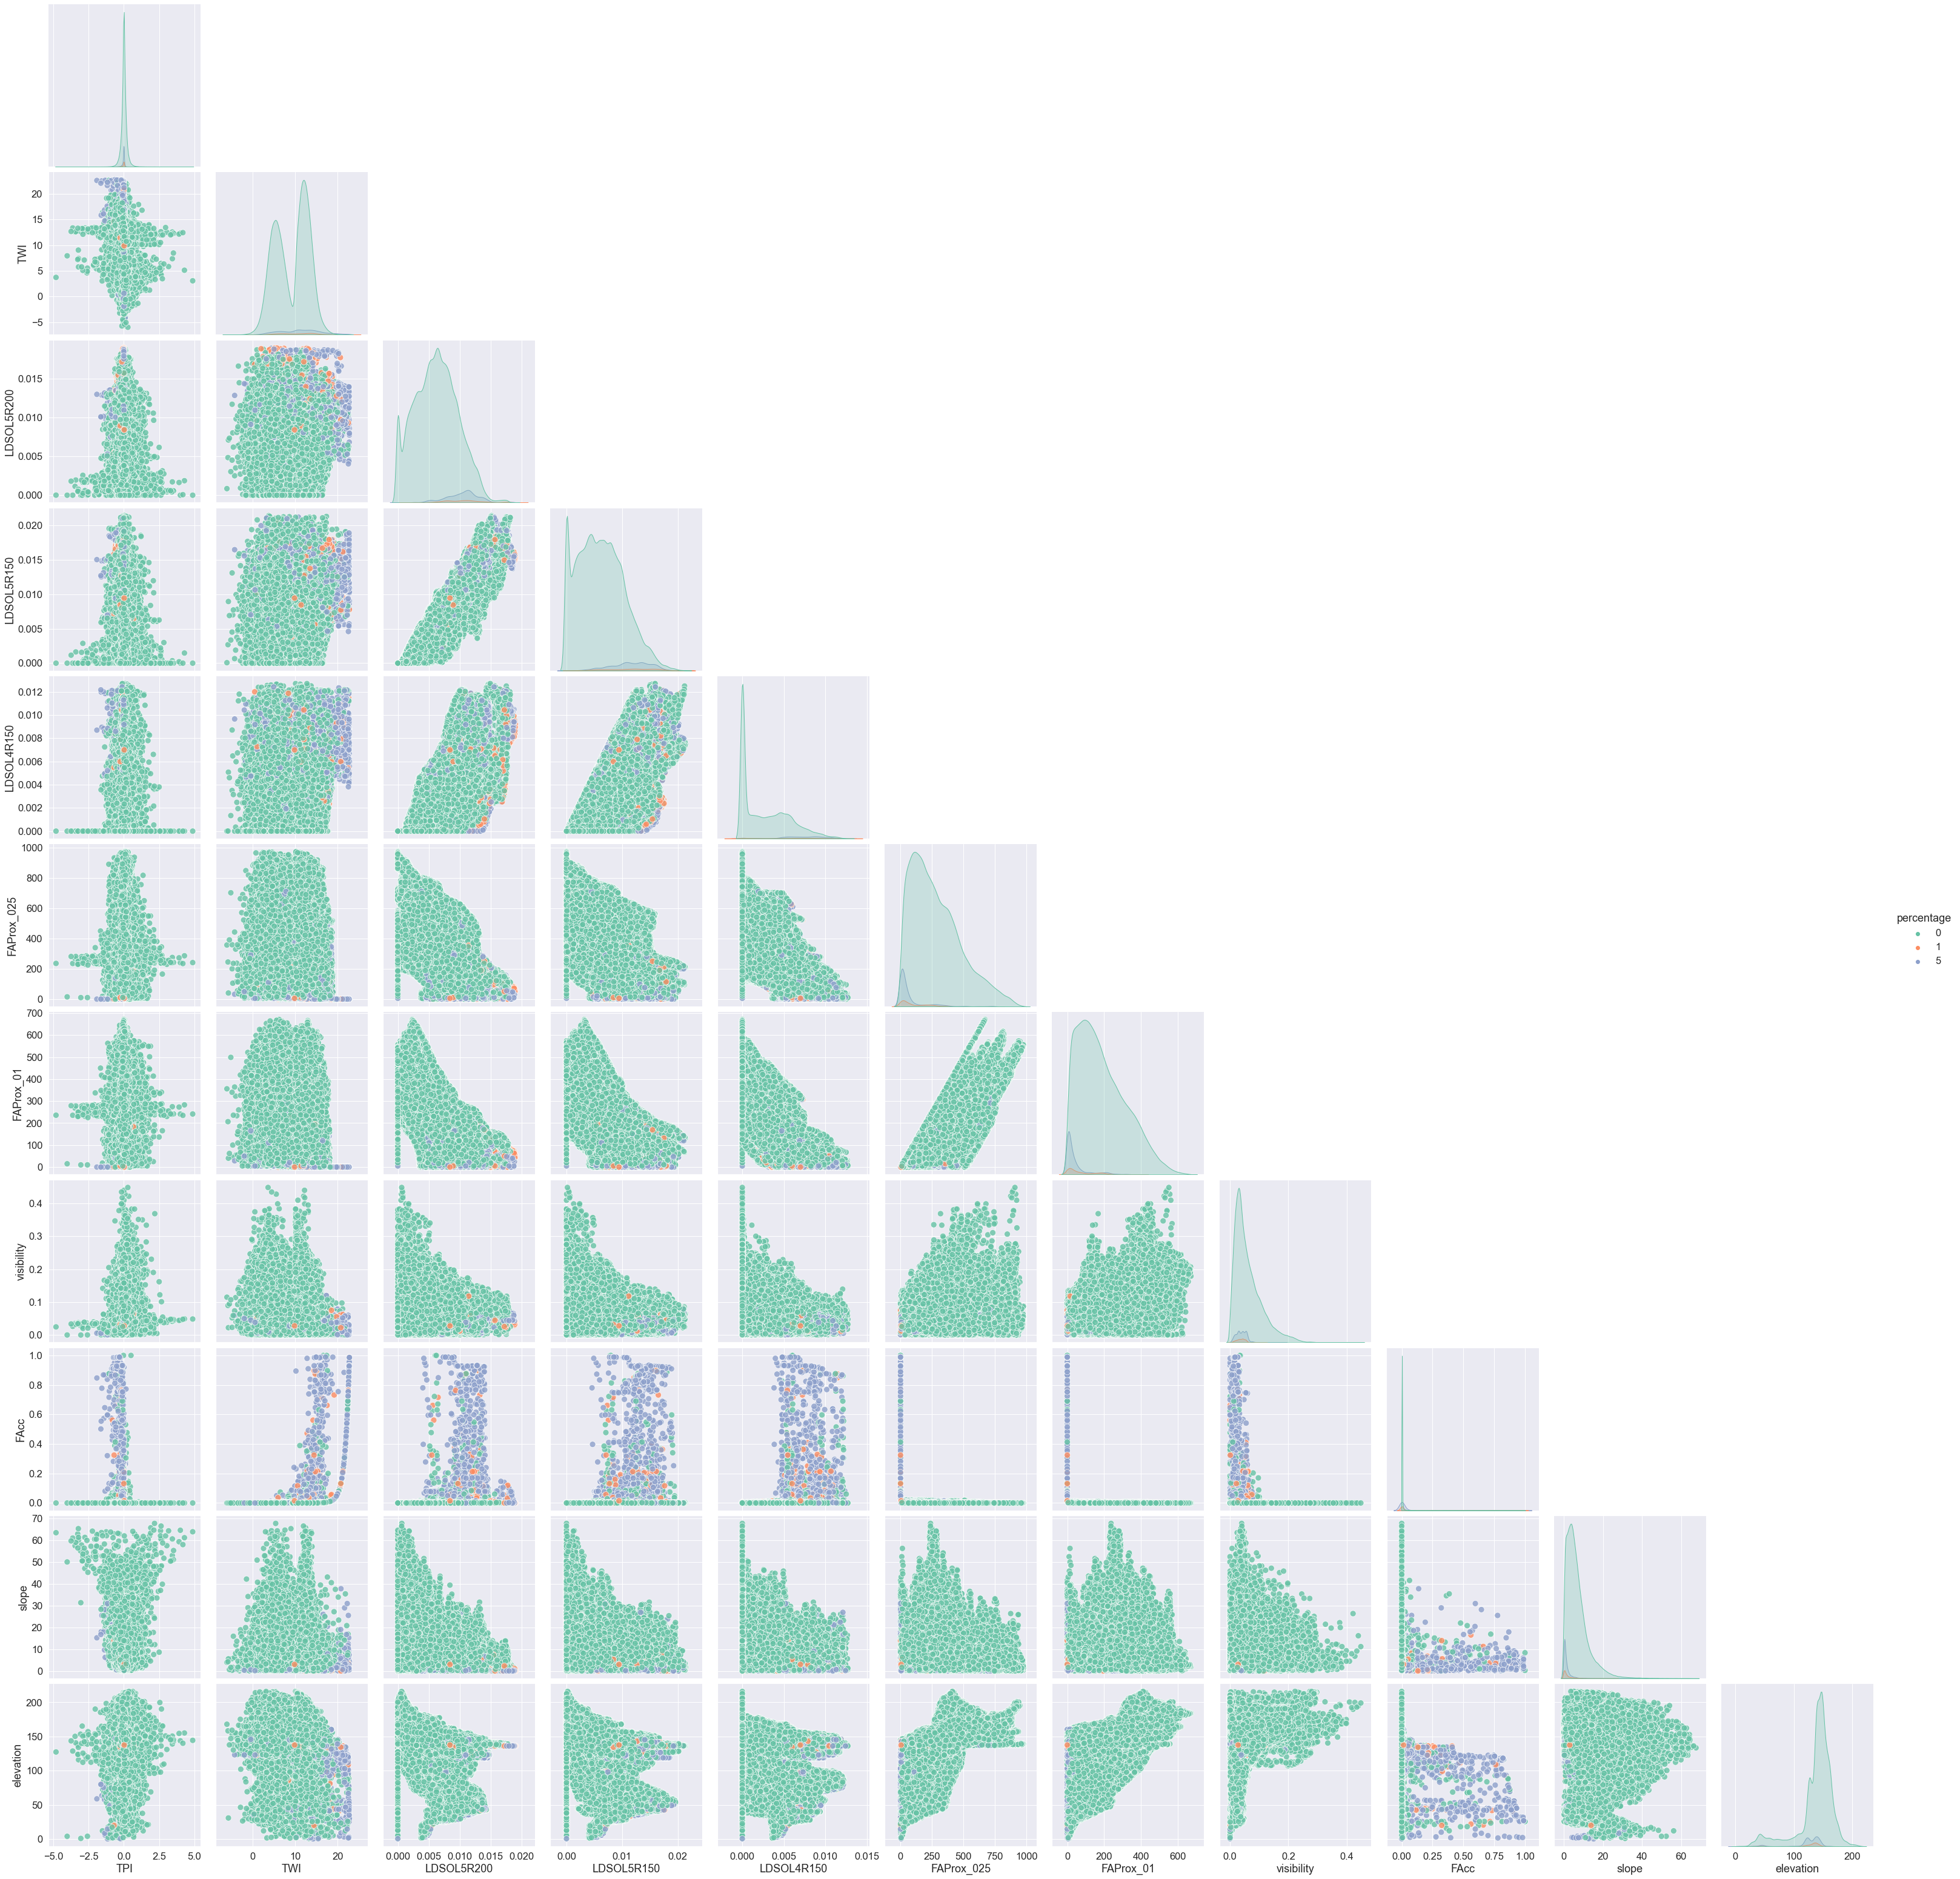

In [83]:
sns.set(font_scale=1.5)
sns.pairplot(DS, hue = 'percentage', diag_kind = 'kde', 
             plot_kws = {'alpha': 0.8, 's': 100},
             height = 4, corner=True, palette = "Set2")# vars = ['life_exp', 'log_pop', 'log_gdp_per_cap'],

# sns.pairplot(DS, hue="percentage")

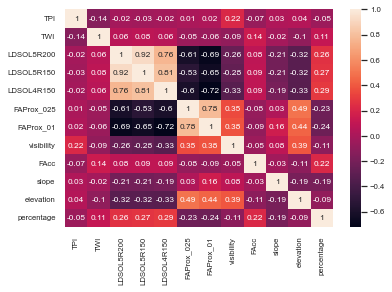

In [84]:
####. Covariance Matrix
sns.set(font_scale=0.7)
matrix = DS.corr().round(2)
sns.heatmap(matrix, annot=True)
plt.set_figsize=(25,20)
plt.show()

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier

estimator = RandomForestClassifier(criterion='entropy', random_state = 50)
x_train,y_train = ms.importDataSet('basin1Train.csv', 'percentage')
classifier = OneVsRestClassifier(estimator).fit(x_train,y_train)


In [ ]:
classifier = ms.loadModel('./outputs/2022-08-05/11-01-57/2208051101.pkl')
x_test,y_test = ms.importDataSet('basin1Test.csv', 'percentage')

x_test = ms.removeCoordinatesFromDataSet(x_test)

# y_prob = classifier.predict_proba(x_test)
#print(np.unique(y_prob))

In [ ]:
md.plot_ROC_AUC_OneVsRest(classifier, x_test, y_test)

In [ ]:
_,y_test = ms.importDataSet('./bestModels/Classifier/10-18-08/2208051018prediction_basin1Test.csv', 'prediction')
unique, count = np.unique(y_test, return_counts=True)
total = count.sum()
print(total)
percent = np.round(np.zeros_like(unique).astype('float16'),3)
print('values, counts , percent')
for i in range(len(unique)):    
   percent[i] = (count[i]/total)*100
   print(unique[i],"\t", count[i], percent[i])
